<img src="https://rhyme.com/assets/img/logo-dark.png" align=center></img>
<h2 align="center">Predict Employee Churn with Decision Trees and Random Forests</h2>

### Task 1: Import Libraries
---

In [4]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In C:\Users\Ajinkeya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Ajinkeya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Ajinkeya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [5]:
plt.rcParams['figure.figsize'] = (12,8)

### Task 2: Exploratory Data Analysis
---

In [6]:
#dt and rff dont require extensive data preprocessing
hr=pd.read_csv('employee_data.csv')
hr.head()  #quit is the target label where 1 means person quits and 0 retained

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
hr.profile_report(title='Data Report') #important EDA tool for dataset analysis

Text(0, 0.5, 'Frequency of employee turnover/quitting')

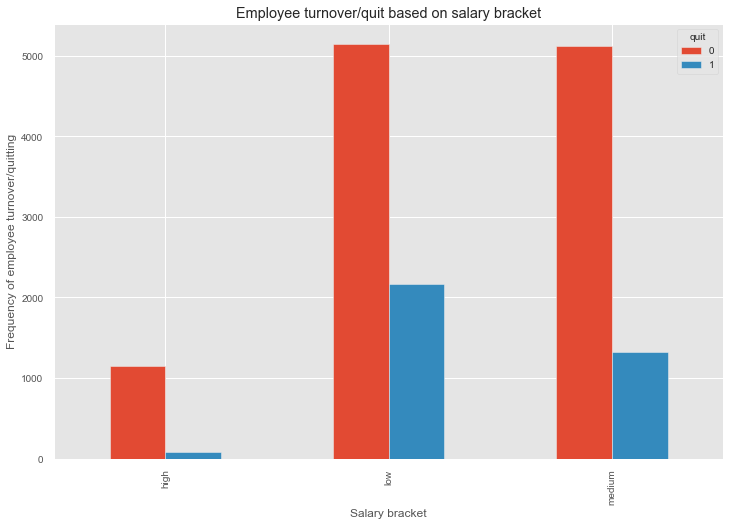

In [8]:
#now to plot categorical features obtained from profile_report i.e. salary brackey and department vs the target variable
pd.crosstab(hr.salary,hr.quit).plot(kind='bar') #crosstab enables to see how acc to salary bracket the frequency of employees quitting varies and bar chart used as salary is a categorical data type
plt.title('Employee turnover/quit based on salary bracket')
plt.xlabel('Salary bracket')
plt.ylabel('Frequency of employee turnover/quitting')
#low and medium salaried employees quit more

Text(0, 0.5, 'Frequency of turnover')

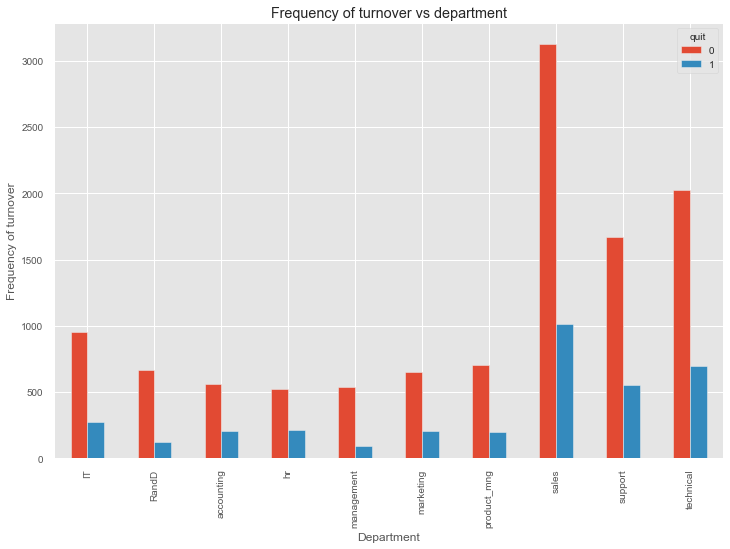

In [9]:
pd.crosstab(hr.department,hr.quit).plot(kind='bar')
plt.title('Frequency of turnover vs department')
plt.xlabel('Department')
plt.ylabel('Frequency of turnover')
#departments such as sales and technical see more quitting by employees

### Task 3: Encode Categorical Features
---

In [10]:
#categorical features are in string/object format and cannot be fed to ML algos directly and so have to be encoded first in one hot format using get_dummies method
cat_vars=['department','salary']
for var in cat_vars:
    cat_list=pd.get_dummies(hr[var],prefix=var)
    hr=hr.join(cat_list)

In [11]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [12]:
#now to drop the redundant department and salary categorical data columns
hr.drop(columns=['department','salary'],inplace=True)

In [13]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### Task 4: Visualize Class Imbalance
---

In [14]:
#one of the biggest problems that could be happening if not getting a good accuracy is imbalanced class i.e. no of positive examples and negative examples are extremely disproportionate and so always visualize the class distributions like this first.
#if a class imbalance problem is being faced then do stratified sampling of data so that uniform number of both class examples are given to training and validation sets
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

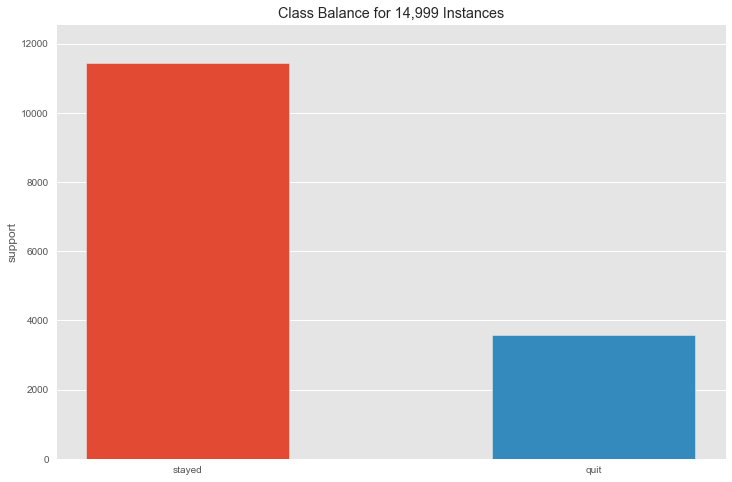

In [15]:
visualizer=ClassBalance(labels=['stayed','quit']).fit(hr.quit)
visualizer.show()

### Task 5: Create Training and Test Sets
---

In [16]:
X=hr.loc[:,hr.columns != 'quit'] #feature matrix
y=hr.quit #target vector

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)  
#to address class imbalance problem we set sampling type to stratified on the target vector so that uniform distribution of both classes in train and test sets occurs


### Task 6 & 7: Build an Interactive Decision Tree Classifier
---

Supervised learning: 
- The inputs are random variables $X = X_1, ..., X_p$;
- The output is a random variable $Y.$

- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$

About:
 
 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption
 
- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.

#### Decision trees: partitioning the feature space:

![partition](assets/images/partition-feature-space.png)

- Decision trees generally have low bias but have high variance.
- We will solve the high variance problem in Task 8.

In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [21]:
@interact  #this line is to make the following function an interective one where the parameters of the function can be modified directly from jupyter interactive display and its corresponding results be observed directly without needing to code it
 #the following are the parameters that are to be made interactive for the user
def plot_tree(crit=['gini','entropy'],   #this will be a drop down menu
              split=['best','random'],                    #also a drop down menu and option between best and random split     
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),  #value is just initial random value
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator=DecisionTreeClassifier(random_state=0,
                                    criterion=crit,
                                    splitter=split,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf)
    estimator.fit(X_train,y_train)
    print('Decison Tree training accuracy: {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))))
    print('Decison Tree test accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test))))
    #graph is used to finally create the graph of our trained model
    graph=Source(tree.export_graphviz(estimator,out_file=None,     #outfile indiactes if yoou want to output the graph to a png,pdf,jpeg,etc
                                     feature_names=X_train.columns,
                                     class_names=['stayed','quit'],
                                     filled=True)) #filled used to display the values in graph
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 8: Build an Interactive Random Forest Classifier
---

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [22]:
#one of the biggest problems of decision trees is high variance i.e. prone to overfitting training data so that is overcome by Random Forests by randomization and averaging
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator=RandomForestClassifier(random_state=1,
                                    criterion=crit,
                                    bootstrap=bootstrap,
                                    n_estimators=forests,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf,
                                    n_jobs=-1,
                                    verbose=False).fit(X_train,y_train)
    print('Random Forest training accuracy: {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))))
    print('Random Forest test accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test))))
    num_tree=estimator.estimators_[0]  #cant display all trees in forest so we only display tree 0
    print('Visualizing tree:',0)
    graph=Source(tree.export_graphviz(num_tree,out_file=None,     #dont include estimator arguement for random forest
                                     feature_names=X_train.columns,
                                     class_names=['stayed','quit'],
                                     filled=True)) #filled used to display the values in graph
    display(Image(data=graph.pipe(format='png')))
    return estimator
    

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 9: Feature Importance and Evaluation Metrics
---

In [23]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

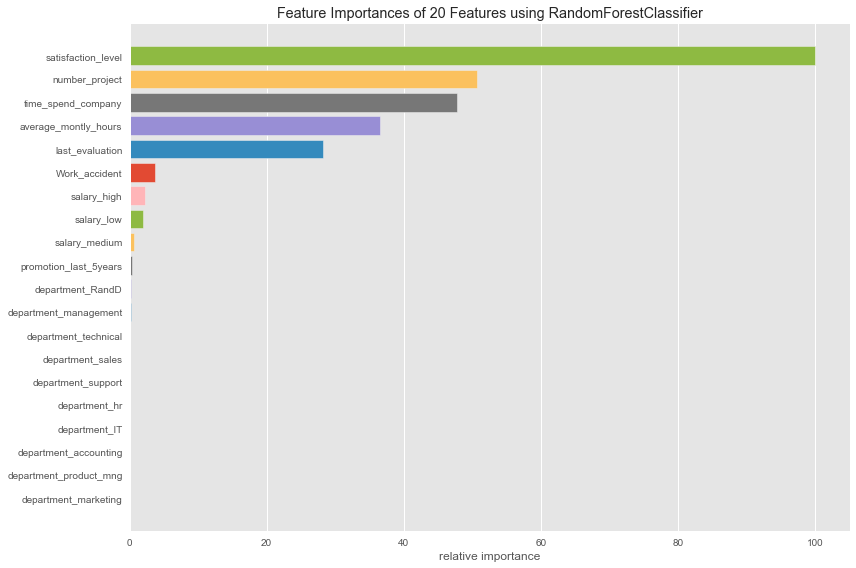

In [25]:
#first of all set the feature values of rf annd dt to get a resonably well accuracy and then copy that instance parameters here and determine relative importance of features
rf=RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)
viz=FeatureImportances(rf)
viz.fit(X_train,y_train)
viz.show()

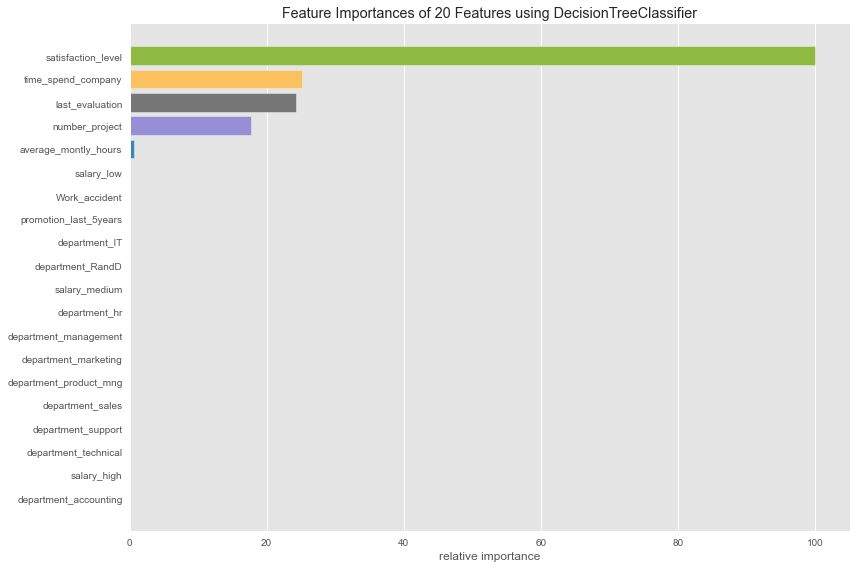

In [26]:
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
viz=FeatureImportances(dt)
viz.fit(X_train,y_train)
viz.show()

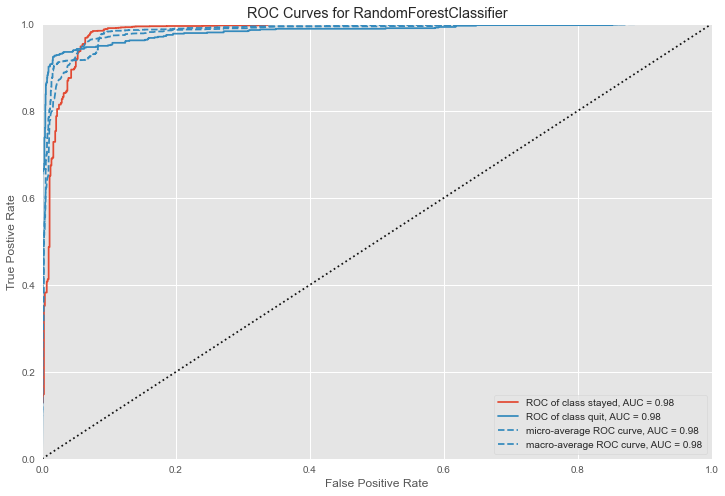

In [28]:
#as we had imbalanced classes we must rely on other metrics other than accuracy
from yellowbrick.classifier import ROCAUC
visualizer=ROCAUC(rf,classes=['stayed','quit'])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

#rf does extremely well as AUC is large and curve is extremely close to left top corner

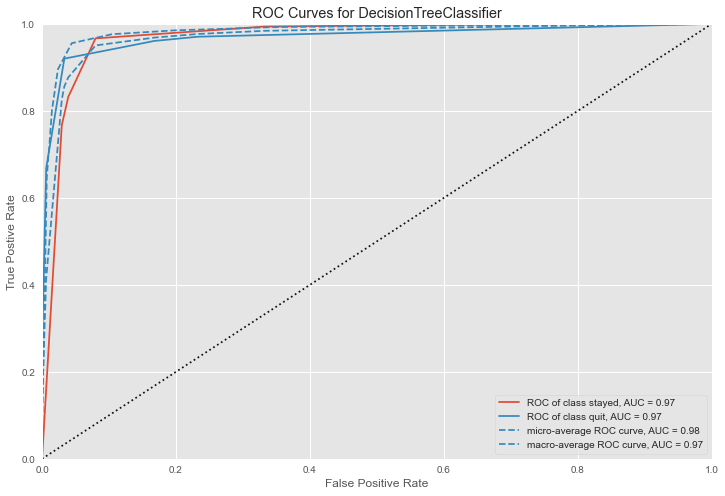

In [29]:
visualizer=ROCAUC(dt,classes=['stayed','quit'])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()